Loan Amount: ₹1000000, Interest Rate: 10%, Tenure: 10 years

Interest lost due to early closure at month 60: 310986.16


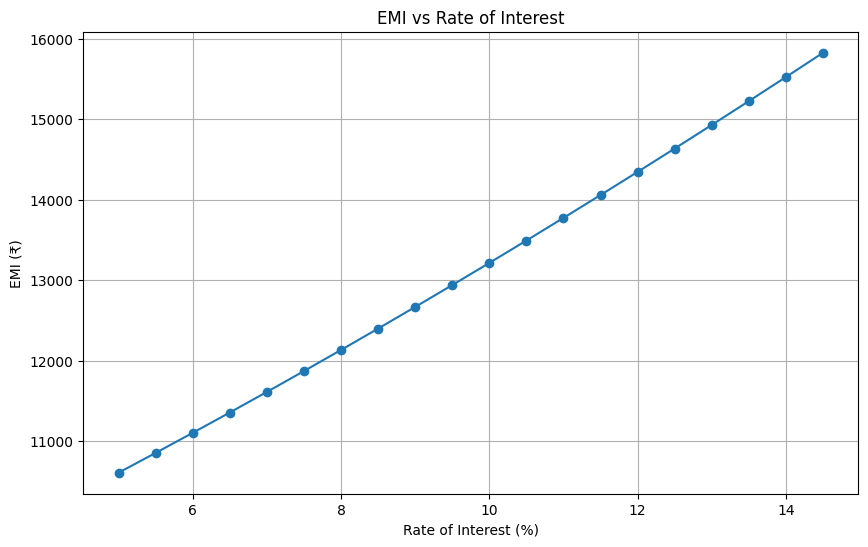

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_emi(principal, rate_of_interest, tenure_years):
    tenure_months = tenure_years * 12
    monthly_interest_rate = rate_of_interest / (12 * 100)
    emi = principal * monthly_interest_rate * (1 + monthly_interest_rate) ** tenure_months / ((1 + monthly_interest_rate) ** tenure_months - 1)
    return emi, tenure_months

def loan_summary(principal, rate_of_interest, tenure_years, early_closure_month):
    emi, total_months = calculate_emi(principal, rate_of_interest, tenure_years)
    remaining_principal = principal
    interest_paid = 0
    balance_list = []
    emi_list = []

    for month in range(1, total_months + 1):
        interest_for_month = remaining_principal * rate_of_interest / (12 * 100)
        principal_payment = emi - interest_for_month
        remaining_principal -= principal_payment
        interest_paid += interest_for_month
        balance_list.append(remaining_principal)
        emi_list.append(emi)

        if month == early_closure_month:
            interest_lost = sum([remaining_principal * rate_of_interest / (12 * 100) for _ in range(month, total_months)])
            print(f"Interest lost due to early closure at month {early_closure_month}: {interest_lost:.2f}")
            break

    return emi_list[:early_closure_month], balance_list[:early_closure_month]

def plot_emi_vs_roi(principal, tenure_years):
    rates_of_interest = np.arange(5, 15, 0.5)
    emis = []

    for rate in rates_of_interest:
        emi, _ = calculate_emi(principal, rate, tenure_years)
        emis.append(emi)

    plt.figure(figsize=(10, 6))
    plt.plot(rates_of_interest, emis, marker='o')
    plt.title('EMI vs Rate of Interest')
    plt.xlabel('Rate of Interest (%)')
    plt.ylabel('EMI (₹)')
    plt.grid(True)
    plt.show()

def main():
    principal = 1000000
    rate_of_interest = 10
    tenure_years = 10
    early_closure_month = 60

    print(f"Loan Amount: ₹{principal}, Interest Rate: {rate_of_interest}%, Tenure: {tenure_years} years\n")

    emi_list, balance_list = loan_summary(principal, rate_of_interest, tenure_years, early_closure_month)
    plot_emi_vs_roi(principal, tenure_years)

if __name__ == "__main__":
    main()
